<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!pip install squarify

In [ ]:
import squarify

In [ ]:
df = pd.read_csv('salary_dataset.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
#Описательная статистика (численные переменные)
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [ ]:
(df.isna().mean() * 100).round(2)

Unnamed: 0             0.00
Age                    0.03
Gender                 0.03
Education Level        0.04
Job Title              0.03
Years of Experience    0.04
Salary                 0.07
Country                0.00
Race                   0.00
dtype: float64

In [ ]:
df_copy = df.copy()

In [ ]:
#Функция по поиску выбросов
def outliers(column):
  q1 = column.quantile(0.25)
  q3 = column.quantile(0.75)
  iqr = q3-q1
  lb = q1 - (1.5 * iqr)
  ub = q3 + (1.5 * iqr)
  res = column[~column.between(lb, ub)]
  return

In [ ]:
#Очистка стобцов с большей частью пропусков
df_copy.dropna(thresh=5, inplace=True)

In [ ]:
#Поиск выбросов в столбце Age
outliers(df_copy['Age'])

1211    61.0
1223    57.0
1225    62.0
1236    62.0
1240    55.0
        ... 
3058    54.0
3067    54.0
3084    54.0
3104    54.0
3120    54.0
Name: Age, Length: 123, dtype: float64

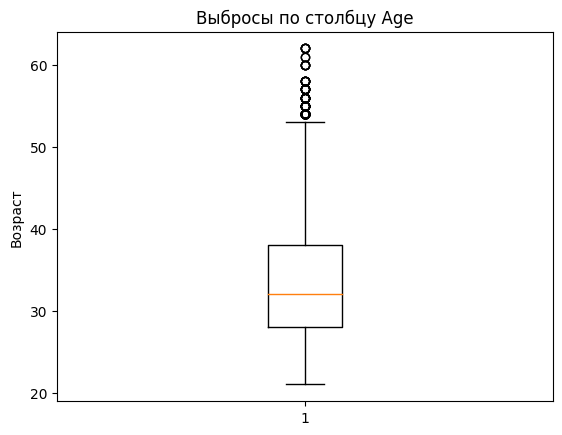

In [ ]:
plt.boxplot(df_copy['Age'])
plt.ylabel('Возраст')
plt.title('Выбросы по столбцу Age')
plt.show()

#Данные выбросы объясняются тем, что среди работников также есть люди старше 50 лет, что вполне логично

In [ ]:
#Поиск выбросов в Years of Experience
outliers(df_copy['Years of Experience'])

2378    31.0
2387    30.0
2392    28.0
2396    33.0
2398    27.0
        ... 
3084    32.0
3104    30.0
3120    28.0
3126    26.0
5247     NaN
Name: Years of Experience, Length: 76, dtype: float64

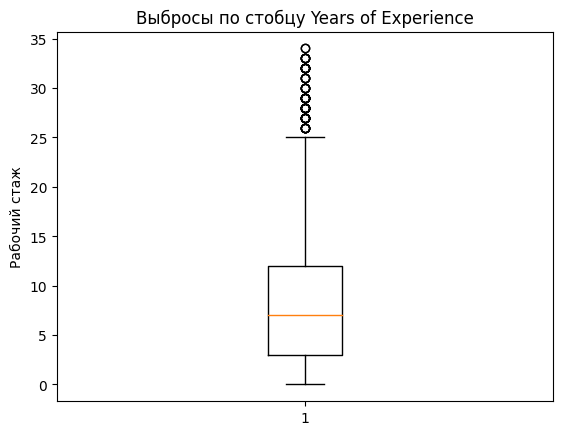

In [ ]:
plt.boxplot(df_copy['Years of Experience'].dropna())
plt.ylabel('Рабочий стаж')
plt.title('Выбросы по стобцу Years of Experience')
plt.show()

#Объясняется возрастом работников, которые были рассмотрены в пред выбросе по столбцу Age

In [ ]:
#Поиск выбросов по стобцу Salary
outliers(df_copy['Salary'])

3136   NaN
5247   NaN
6455   NaN
Name: Salary, dtype: float64

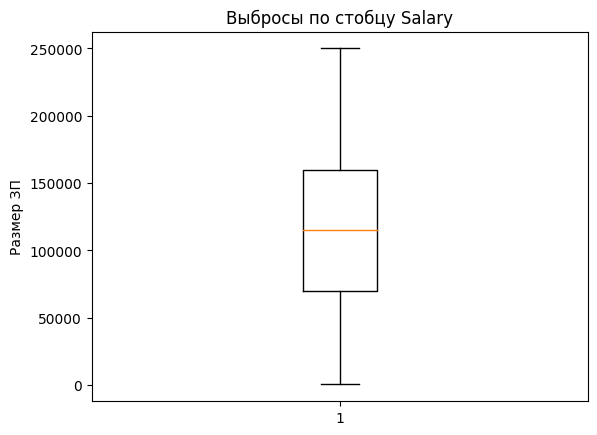

In [ ]:
plt.boxplot(df_copy['Salary'].dropna())
plt.ylabel('Размер ЗП')
plt.title('Выбросы по стобцу Salary')
plt.show()

#Как мы видим, выбросов в данном столбце не наблюдается

In [ ]:
#Education Level относится к категориальной переменной, поэтому заполнение пустых значений будет производиться по моде
#Также стоит учесть, что пропуск в данных незначителен, что оправдывает ранее упомянутый метод
df_copy['Education Level'] = df_copy['Education Level'].fillna(df_copy['Education Level'].mode()[0])

In [ ]:
#Можно предположить, что Years of Experience и Education Level взаимосвязаны
#Тк имеются выбросы и величина непрерывная, заполнение будет проходить по медиане
print(df_copy.groupby('Education Level')['Years of Experience'].median())

#В ходе проверки по группировке было обнаружено,
#что значение некоторых стобцов дублируются по смыслу (Bachelor's и Bachelor's Degree) и необходимо их привести к одному типу
print('---------------------------------')
df_copy.loc[df_copy['Education Level'] == "Bachelor's", 'Education Level'] = "Bachelor's Degree"
df_copy.loc[df_copy['Education Level'] == "Master's", 'Education Level'] = "Master's Degree"
df_copy.loc[df_copy['Education Level'] == "phD", 'Education Level'] = "PhD"

print(df_copy.groupby('Education Level')['Years of Experience'].median())

Education Level
Bachelor's            5.0
Bachelor's Degree     4.0
High School           1.0
Master's              9.0
Master's Degree       9.0
PhD                  14.0
phD                   7.0
Name: Years of Experience, dtype: float64
---------------------------------
Education Level
Bachelor's Degree     4.0
High School           1.0
Master's Degree       9.0
PhD                  14.0
Name: Years of Experience, dtype: float64


In [ ]:
df_copy['Years of Experience'] = df_copy['Years of Experience'].fillna(df_copy.groupby('Education Level')['Years of Experience'].transform('median'))

In [ ]:
#Можно предположить, что столбец Salary будет взаимосвязан со столбцами Country и Education level
print(df_copy.groupby(['Country', 'Education Level'])['Salary'].median())

df_copy['Salary'] = df_copy['Salary'].fillna(df_copy.groupby(['Country', 'Education Level'])['Salary'].transform('median'))

Country    Education Level  
Australia  Bachelor's Degree     80000.0
           High School           31000.0
           Master's Degree      127346.0
           PhD                  180000.0
Canada     Bachelor's Degree     80000.0
           High School           30000.0
           Master's Degree      130000.0
           PhD                  170000.0
China      Bachelor's Degree     85000.0
           High School           31500.0
           Master's Degree      125000.0
           PhD                  170000.0
UK         Bachelor's Degree     80000.0
           High School           32000.0
           Master's Degree      130000.0
           PhD                  170000.0
USA        Bachelor's Degree     85000.0
           High School           30000.0
           Master's Degree      130000.0
           PhD                  170000.0
Name: Salary, dtype: float64


In [ ]:
(df_copy.isna().mean() * 100).round(2)

Unnamed: 0             0.0
Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
Country                0.0
Race                   0.0
dtype: float64

In [ ]:
#Проверка статистики после очищения от пропусков
print(df.describe())
print('-------------------------------------------------------------------')
print(df_copy.describe())

#Как мы видим, нам удалось сохранить целостнотсь основных статистических данных

        Unnamed: 0          Age  Years of Experience         Salary
count  6704.000000  6702.000000          6701.000000    6699.000000
mean   3351.500000    33.620859             8.094687  115326.964771
std    1935.422435     7.614633             6.059003   52786.183911
min       0.000000    21.000000             0.000000     350.000000
25%    1675.750000    28.000000             3.000000   70000.000000
50%    3351.500000    32.000000             7.000000  115000.000000
75%    5027.250000    38.000000            12.000000  160000.000000
max    6703.000000    62.000000            34.000000  250000.000000
-------------------------------------------------------------------
        Unnamed: 0          Age  Years of Experience         Salary
count  6702.000000  6702.000000          6702.000000    6702.000000
mean   3352.435691    33.620859             8.094076  115319.357953
std    1934.952777     7.614633             6.058757   52777.735153
min       0.000000    21.000000             0.00

Распредление данных

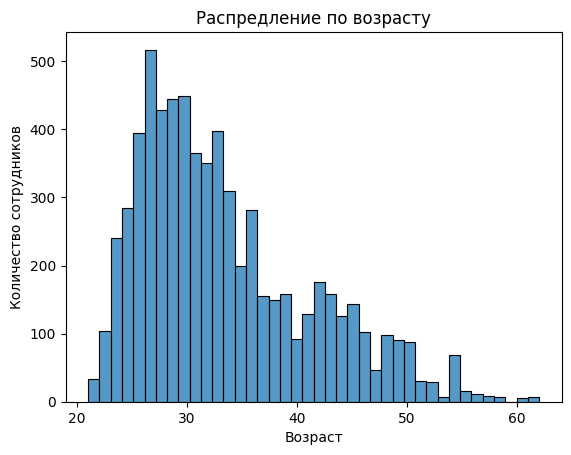

In [ ]:
#По возрасту
sb.histplot(data=df_copy, x="Age", bins=40)
plt.xlabel('Возраст')
plt.ylabel('Количество сотрудников')
plt.title('Распредление по возрасту')
plt.show()
#Данная гистограмма показывает нормальное распередление c отрицательной ассиметрией.
#Это означает, что площадь под графиком больше на левой стороне моды

In [ ]:
print('Мода', df_copy['Age'].mode()[0])
print('Медиана', df_copy['Age'].median())
print('Среднее', df_copy['Age'].mean())

#Значения практически равны, что подтверждает, что распредление близко к нормальному

Мода 27.0
Медиана 32.0
Среднее 33.62085944494181


Text(0.5, 1.0, 'Распредление по зарплате')

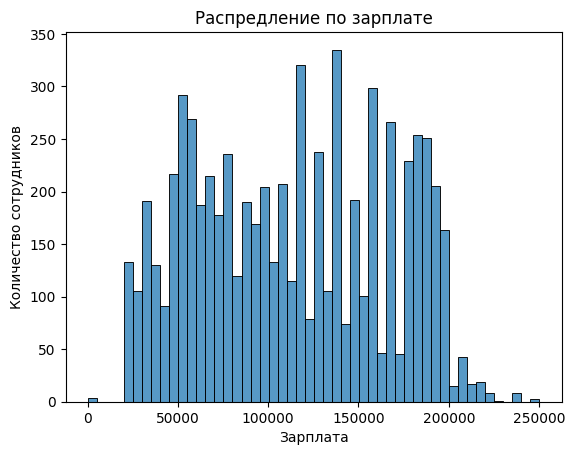

In [ ]:
#По зарплате
sb.histplot(data=df_copy, x="Salary", bins=50)
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распредление по зарплате')

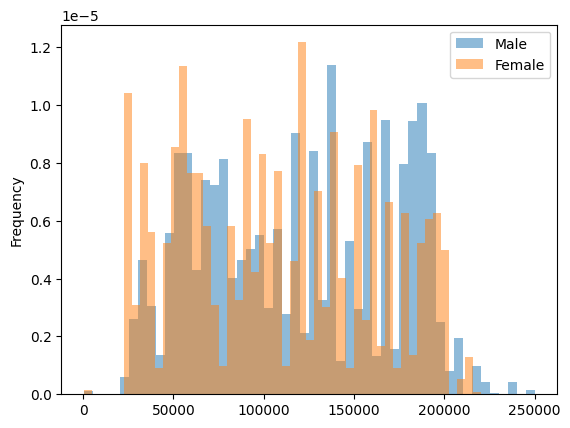

In [ ]:
#Сравнение распредлений по зарплате (разбивка по полу)
col_m = df_copy.loc[df['Gender'] == 'Male', 'Salary']
col_f = df_copy.loc[df['Gender'] == 'Female', 'Salary']

col_m.plot(kind='hist', alpha=0.5, bins=50, density=True)
col_f.plot(kind='hist', alpha=0.5, bins=50, density=True)
plt.legend(['Male', 'Female'])

#Распредления похожи. Можно наблюдать небольшую тенденцию, где
#женщины немного чаще зарабатывают меньше мужчин (я за равноправие)

Text(0.5, 1.0, 'Распредление по опыту работы')

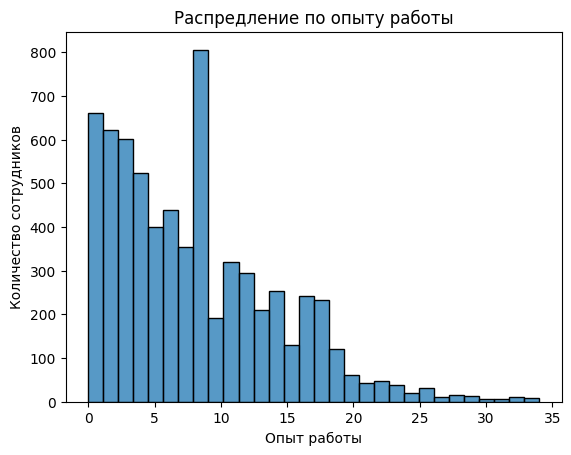

In [ ]:
#По должности
sb.histplot(data=df_copy, x="Years of Experience", bins=30)
plt.xlabel('Опыт работы')
plt.ylabel('Количество сотрудников')
plt.title('Распредление по опыту работы')

#Исходя из гистограммы можно предположить, что мы наблюдаем экспоненциальное распредление

Text(0.5, 1.0, 'Распредление сотрудников по странам')

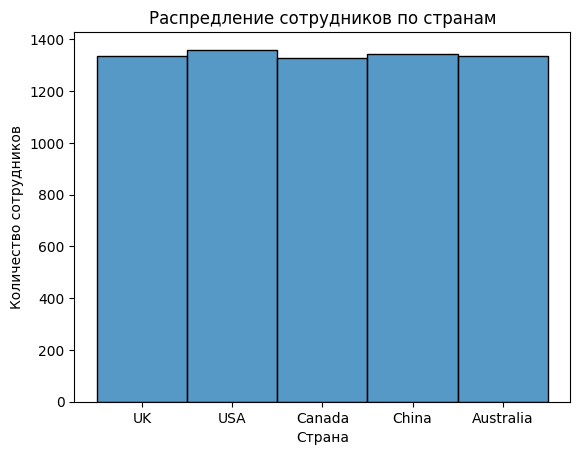

In [ ]:
sb.histplot(data=df_copy, x="Country", bins=50)
plt.xlabel('Страна')
plt.ylabel('Количество сотрудников')
plt.title('Распредление сотрудников по странам')

#Исходя из гистограммы можно предположить, что мы наблюдаем равномерное распредление

<Axes: xlabel='Age', ylabel='Years of Experience'>

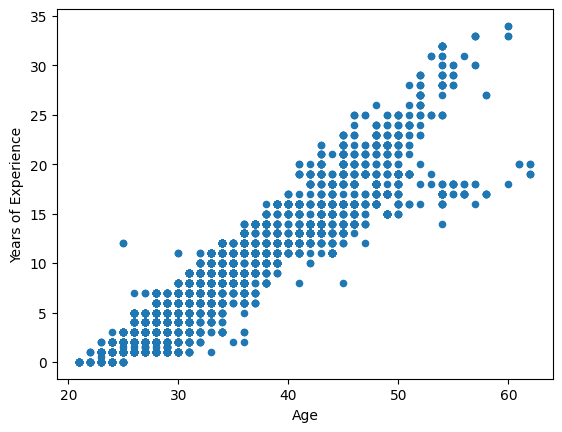

In [ ]:
#Зависимость между возрастом и рабочим стажем
df_copy.plot(kind='scatter', x='Age', y='Years of Experience')

#Можно наблюдать линейную зависимость
#Исходя из графика, можно сделать вывод, что стаж работы и взраст имеют сильную связь

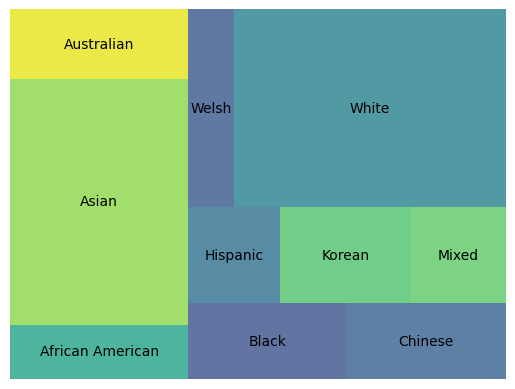

In [ ]:
#Разбивка работников по национальности
df_race = df_copy.groupby('Race')['Country'].count()
df_race = df_race.to_frame().reset_index()
squarify.plot(sizes=df_race.iloc[:, 1], label=df_race.iloc[:, 0], alpha=.8)
plt.axis('off')
plt.show()

#Наибольшее число сотрудников относятся к расовой группе White и Asian

<Axes: xlabel='Years of Experience', ylabel='Salary'>

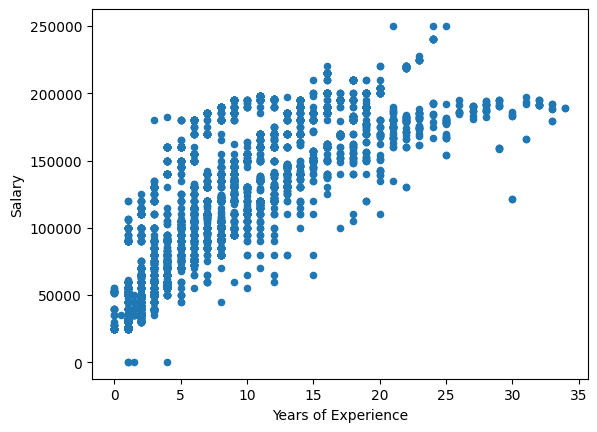

In [ ]:
#Взаимосвязь между опытом работы и зарплатой
df_copy.plot(kind='scatter', x='Years of Experience', y='Salary')

#Наблюдается взаимосвязь между двумя показателями.
#Рост стажа работы сопровождается ростом зп.

<Axes: xlabel='Education Level', ylabel='Salary'>

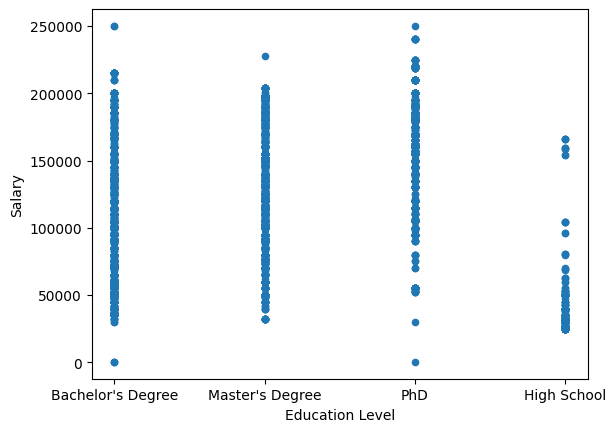

In [ ]:
#Взаимосвязь между уровнем образования и зарплатой
df_copy.plot(kind='scatter', x='Education Level', y='Salary')

#Исходя из графика можно предположить, что уровень образования не влияет на размер зп
#Однако в случае, если у работника только школьное образование, его зп, как правило, ниже.